In [ ]:
import numpy as np
import pandas as pd
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.multioutput import  MultiOutputRegressor
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.model_selection import  train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
data = pd.read_csv('post_evras.csv',sep='\t')

In [ ]:
data

In [ ]:
target_list = ['химшлак последний Al2O3', 'химшлак последний CaO', 'химшлак последний R', 'химшлак последний SiO2']


In [ ]:
X = data.drop(columns=target_list)
y = data[target_list]

In [ ]:
ss = StandardScaler()
ss.fit(X)
X = ss.fit_transform(X)

In [ ]:
np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [ ]:
best_score = 0
best_model = None
for n_estimators in (100,200,300,400):
    for loss in ('ls','lad','huber'):
        mult_model  = MultiOutputRegressor(GradientBoostingRegressor(n_estimators=n_estimators,loss=loss))
        mult_model.fit(X_train,y_train)
        cur_score = r2_score(y_test,mult_model.predict(X_test))
        if cur_score > best_score:
            best_score = cur_score
            best_model = mult_model

In [ ]:
print(best_score)
best_model.fit(X_train,y_train)

In [ ]:
best_model.estimators_[0].feature_importances_

In [ ]:
feature_importance = best_model.estimators_[0].feature_importances_
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
fig = plt.figure(figsize=(25, 50))
plt.subplot(1, 2, 1)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, np.array(data.columns)[sorted_idx])
plt.title('Feature Importance For химшлак последний Al2O3')

In [ ]:
feature_importance = best_model.estimators_[1].feature_importances_
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
fig = plt.figure(figsize=(25, 50))
plt.subplot(1, 2, 1)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, np.array(data.columns)[sorted_idx])
plt.title('Feature Importance For химшлак последний CaO')

In [ ]:
feature_importance = best_model.estimators_[2].feature_importances_
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
fig = plt.figure(figsize=(25, 50))
plt.subplot(1, 2, 1)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, np.array(data.columns)[sorted_idx])
plt.title('Feature Importance  For химшлак последний R')

In [ ]:
feature_importance = best_model.estimators_[3].feature_importances_
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
fig = plt.figure(figsize=(25, 50))
plt.subplot(1, 2, 1)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, np.array(data.columns)[sorted_idx])
plt.title('Feature Importance For химшлак последний SiO2')

In [13]:
data = pd.read_csv('post_evras.csv',sep='\t')

In [14]:
data

,t вып-обр,t обработка,t под током,t продувка,ПСН гр.,чист расход C,чист расход Cr,чист расход Mn,чист расход Si,чист расход V,...,химшлак первый MnO_1,химшлак первый R_1,химшлак первый SiO2_1,химшлак последний Al2O3,химшлак последний CaO,химшлак последний FeO,химшлак последний MgO,химшлак последний MnO,химшлак последний R,химшлак последний SiO2
0,29.0,45.366667,24.400000,41.033333,0.000000,0.456460,0.059572,0.117446,0.104762,0.040938,...,0.12,2.6,0.0,0.0,53.4,1.0,5.8,0.15,2.6,0.0
1,26.0,44.066667,13.866667,44.066667,0.000000,0.359285,0.083738,0.160923,0.110327,0.040083,...,0.14,2.2,0.0,0.0,59.3,0.6,4.1,0.11,2.3,0.0
2,24.0,43.350000,17.950000,43.350000,0.000000,0.331665,0.081490,0.132332,0.139860,0.041622,...,0.12,2.6,0.0,0.0,57.2,0.5,8.1,0.13,2.3,0.0
3,17.0,46.183333,19.816667,46.183333,0.000000,0.377945,0.133194,0.221605,0.165186,0.042050,...,0.11,2.4,0.0,0.0,60.3,0.5,6.3,0.12,2.6,0.0
4,20.0,48.500000,17.033333,48.500000,0.000000,0.389875,0.105094,0.169459,0.143024,0.040967,...,0.12,2.4,0.0,0.0,60.3,0.6,4.5,0.09,2.5,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4948,33.0,42.200000,17.850000,42.200000,4.000000,0.471755,0.137332,0.139956,0.176122,0.041047,...,0.63,2.1,25.2,6.6,56.1,0.9,7.0,0.18,2.3,24.6
4949,34.0,42.050000,18.533333,42.050000,2.689759,0.465055,0.112868,0.096618,0.140631,0.040180,...,0.20,2.5,20.4,5.0,57.5,0.3,9.9,0.16,2.5,23.4
4950,13.0,47.850000,20.750000,47.850000,3.000000,0.470500,0.153456,0.174962,0.130023,0.039660,...,0.13,2.4,22.4,6.2,58.0,0.6,7.1,0.12,2.3,25.2
4951,14.0,40.683333,18.633333,40.683333,3.754131,0.452055,0.135108,0.141276,0.126359,0.039110,...,0.24,2.4,22.6,5.4,52.1,0.7,9.9,0.16,2.3,22.9


In [15]:
target_list = ['химшлак последний Al2O3', 'химшлак последний CaO', 'химшлак последний R', 'химшлак последний SiO2']


In [17]:
X = data.drop(columns=target_list)
y = data[target_list]

In [19]:
ss = StandardScaler()
ss.fit(X)
X = ss.fit_transform(X)

In [27]:
np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [39]:
best_score = 0
best_model = None
for n_estimators in (100,200,300,400):
    for loss in ('ls','lad','huber'):
        mult_model  = MultiOutputRegressor(GradientBoostingRegressor(n_estimators=n_estimators,loss=loss))
        mult_model.fit(X_train,y_train)
        cur_score = r2_score(y_test,mult_model.predict(X_test))
        if cur_score > best_score:
            best_score = cur_score
            best_model = mult_model

In [55]:
print(best_score)
best_model.fit(X_train,y_train)

0.9645390499907724


MultiOutputRegressor(estimator=GradientBoostingRegressor())

In [57]:
best_model.estimators_[0].feature_importances_

array([5.21713000e-04, 7.55561021e-05, 7.61634544e-05, 8.67905253e-05,
       1.55993424e-04, 3.18200803e-05, 3.37833899e-04, 1.84838694e-04,
       8.08836592e-04, 9.80572087e-05, 8.66441358e-04, 1.39822379e-04,
       3.82439203e-05, 1.05589488e-04, 7.03033032e-04, 1.65008203e-04,
       0.00000000e+00, 0.00000000e+00, 8.76061856e-05, 4.84465813e-04,
       8.67042338e-05, 9.33732325e-06, 3.64090855e-04, 1.52840471e-04,
       3.53889453e-06, 1.76263663e-04, 1.67557933e-04, 1.57959082e-04,
       2.69039183e-04, 3.44792081e-04, 2.90465797e-03, 2.62666372e-04,
       2.39078474e-05, 2.09862235e-04, 0.00000000e+00, 1.38867010e-04,
       1.34270030e-04, 1.10829211e-04, 5.09247728e-04, 2.03888891e-04,
       0.00000000e+00, 0.00000000e+00, 2.12382508e-04, 4.09132860e-04,
       3.90273205e-05, 4.90966364e-05, 2.51240173e-04, 2.70018083e-05,
       3.86828161e-04, 5.49660924e-05, 3.68734578e-05, 2.22018439e-04,
       3.91960403e-04, 3.37974371e-04, 0.00000000e+00, 2.04813764e-04,
      

Text(0.5, 1.0, 'Feature Importance For химшлак последний Al2O3')

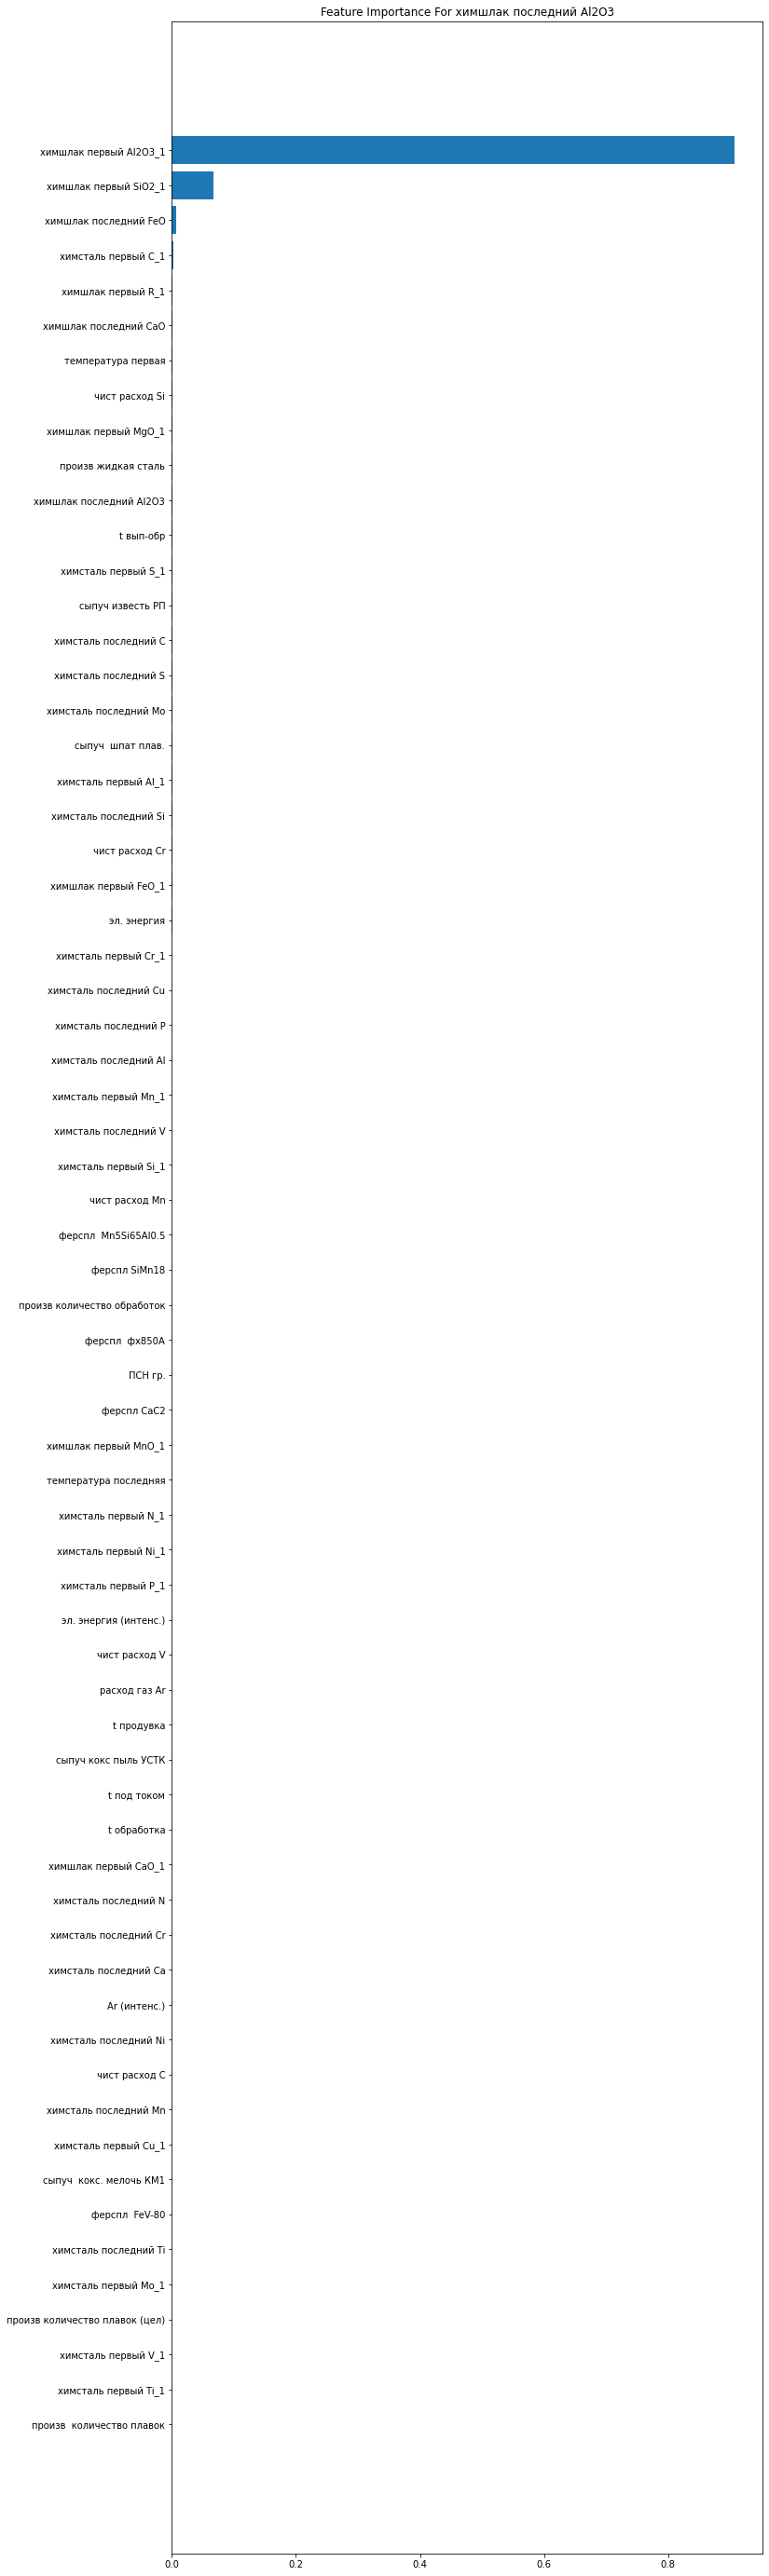

In [66]:
feature_importance = best_model.estimators_[0].feature_importances_
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
fig = plt.figure(figsize=(25, 50))
plt.subplot(1, 2, 1)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, np.array(data.columns)[sorted_idx])
plt.title('Feature Importance For химшлак последний Al2O3')

Text(0.5, 1.0, 'Feature Importance For химшлак последний CaO')

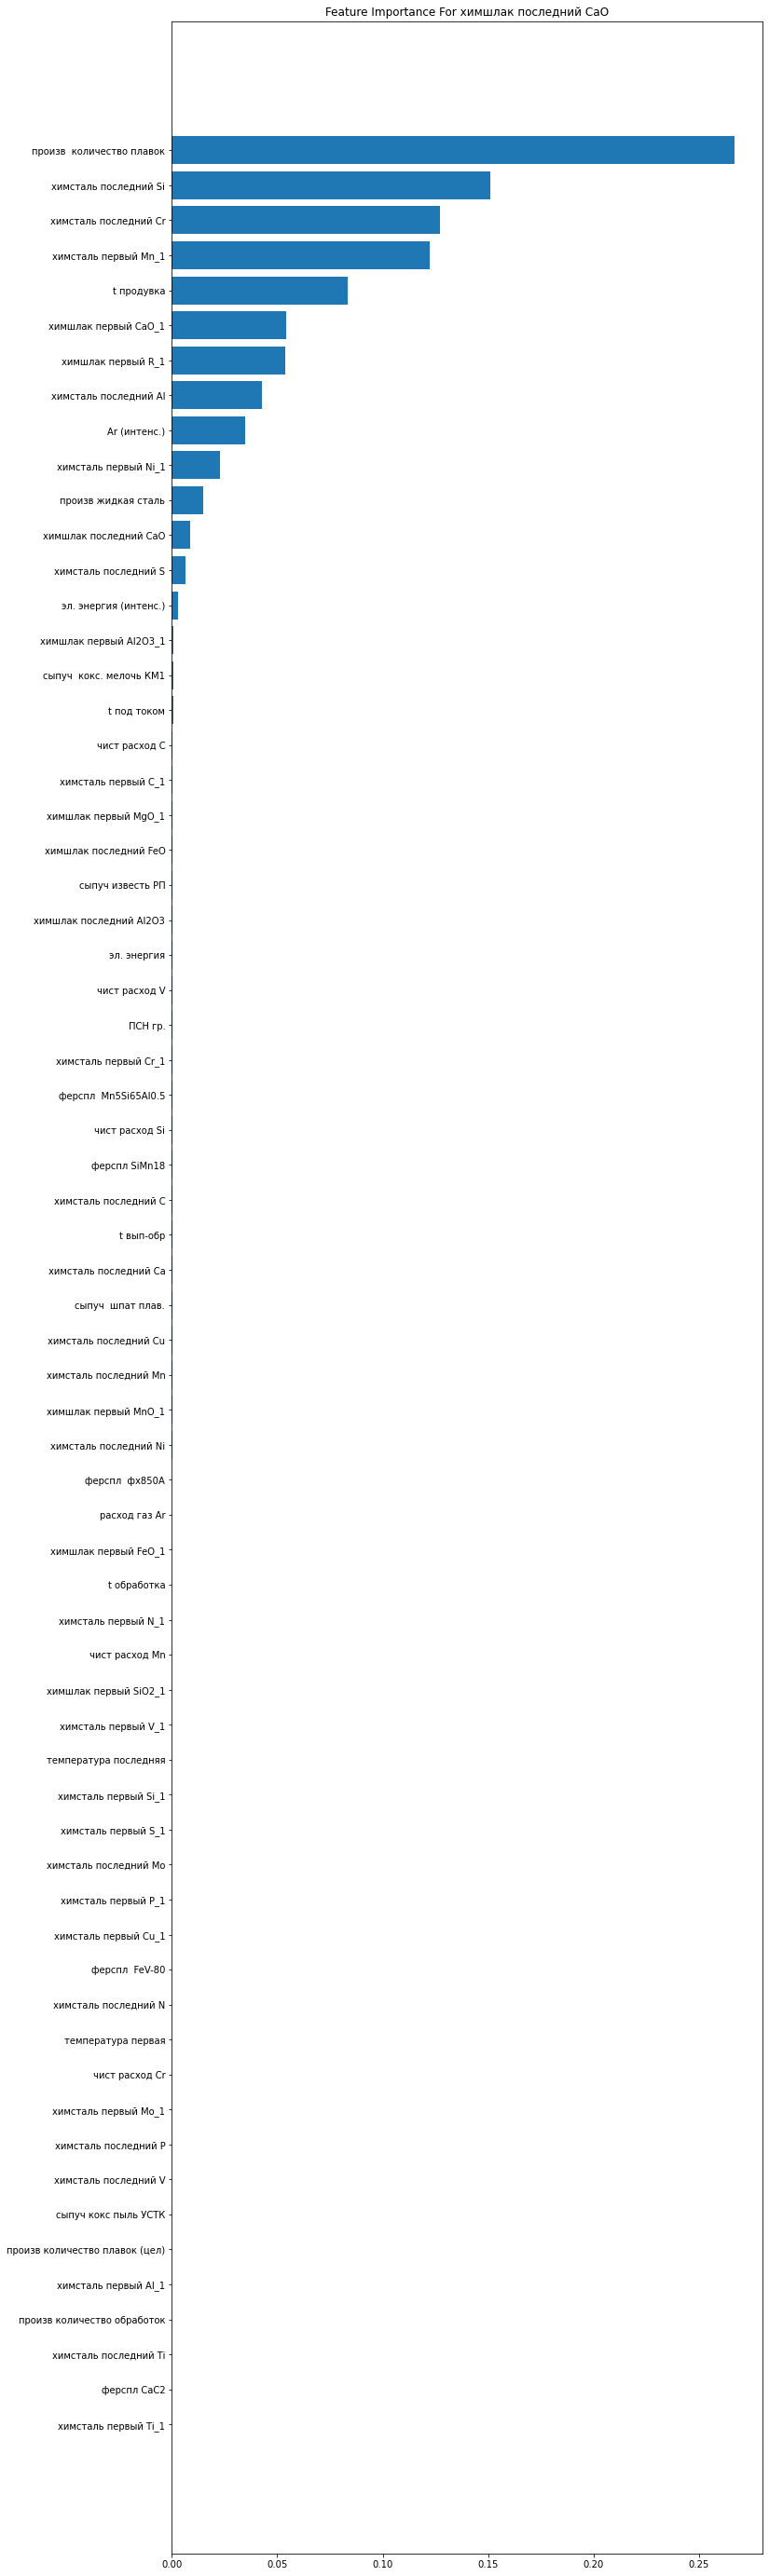

In [67]:
feature_importance = best_model.estimators_[1].feature_importances_
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
fig = plt.figure(figsize=(25, 50))
plt.subplot(1, 2, 1)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, np.array(data.columns)[sorted_idx])
plt.title('Feature Importance For химшлак последний CaO')

Text(0.5, 1.0, 'Feature Importance  For химшлак последний R')

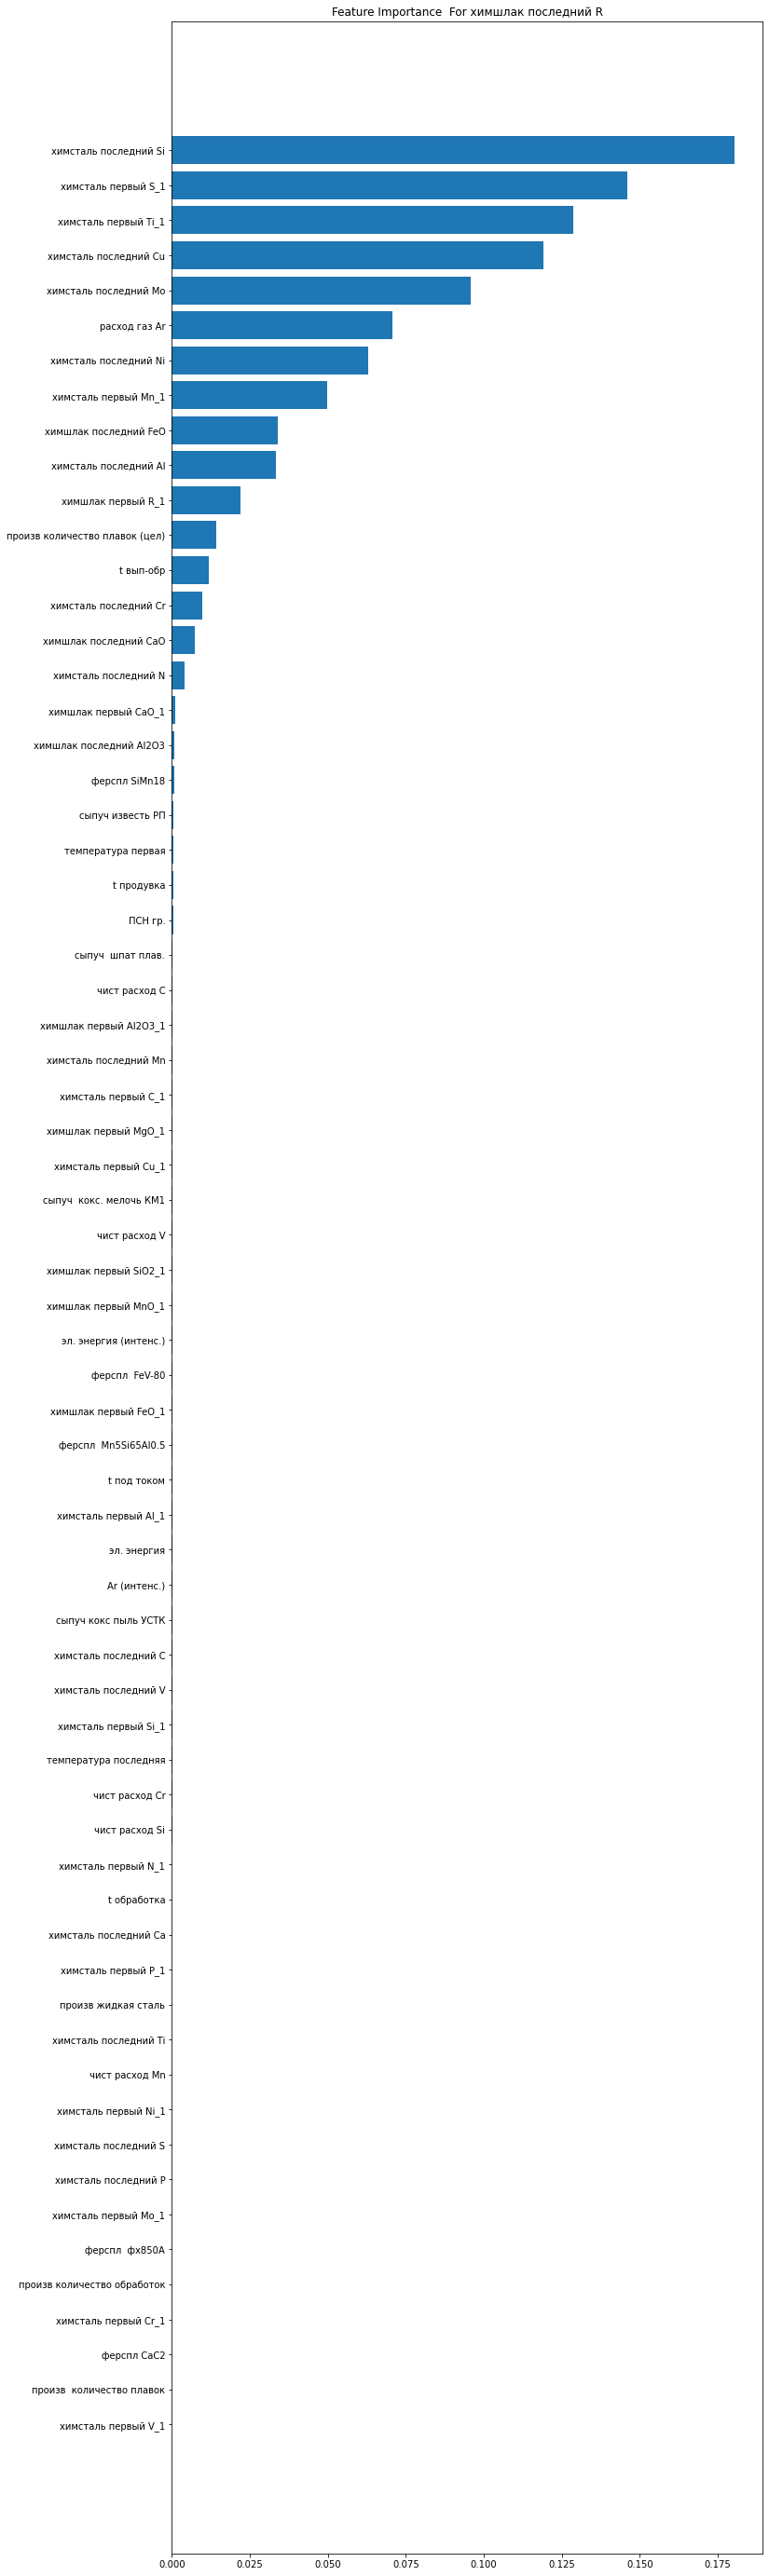

In [68]:
feature_importance = best_model.estimators_[2].feature_importances_
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
fig = plt.figure(figsize=(25, 50))
plt.subplot(1, 2, 1)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, np.array(data.columns)[sorted_idx])
plt.title('Feature Importance  For химшлак последний R')

Text(0.5, 1.0, 'Feature Importance For химшлак последний SiO2')

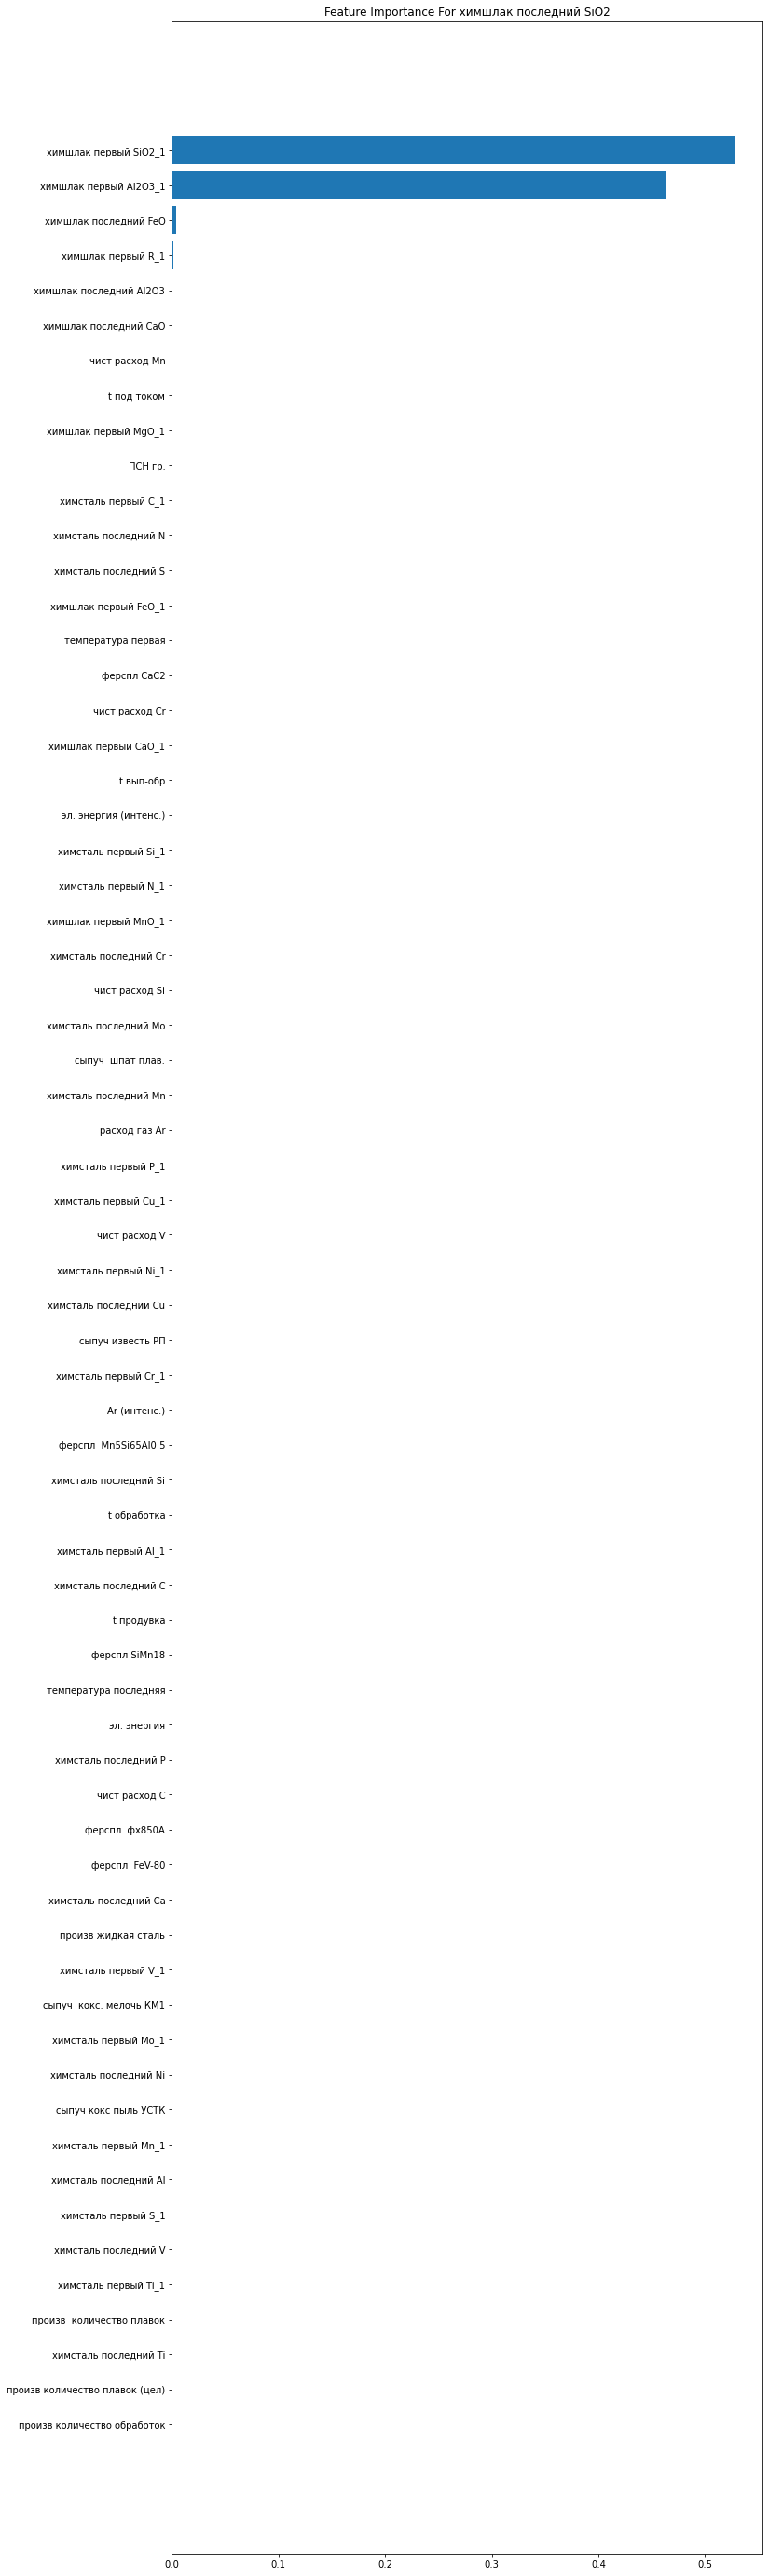

In [69]:
feature_importance = best_model.estimators_[3].feature_importances_
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
fig = plt.figure(figsize=(25, 50))
plt.subplot(1, 2, 1)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, np.array(data.columns)[sorted_idx])
plt.title('Feature Importance For химшлак последний SiO2')